In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [5]:
root_path = "/Users/cdq/Desktop/opensource/FedPrompt/data/overall-performance/roberta-large-old-11.25/"
output_fig_path = '/Users/cdq/Desktop/opensource/FedPrompt/figs/overall'
# roberta-large
filenames_list = {
    "agnews": ["seed_6_fedclassifier_64_32_roberta-large.log", "seed_6_all_aug_100_conver_0_limit_0_fedpet_64_32_roberta-large.log", "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log"],
    "mnli": ["seed_6_fedclassifier_1024_32_roberta-large.log", "all_aug_20_conver_10_limit_0.0_fedpet_1024_32_roberta-large.log", "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.2.log"],
    "yahoo": ["seed_6_fedclassifier_256_32_roberta-large.log", "all_aug_20_conver_1_limit_0.0_fedpet_256_32_roberta-large.log", "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log"],
    "yelp-full": ["seed_6_fedclassifier_256_32_roberta-large.log", "all_aug_20_conver_3_limit_0.0_fedpet_256_32_roberta-large.log", "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.5.log"]
}

labels = ["FedCLS", "Ours", "Ours+"]

communication_latency_list = {"bitfit": 1000 * 2 / 1000 / 1, "full": 1000 * 2 / 1}

In [6]:
# plot hyper-para.
colors=['r','g','b','y','c','m','k'] * 100
full_set_acc= {"agnews": 0.93, "yahoo": 0.78, "yelp-full": 0.7, "mnli": 0.85}

/Users/cdq/Desktop/opensource/FedPrompt/data/overall-performance/roberta-large-old-11.25/agnews/seed_6_fedclassifier_64_32_roberta-large.log
max accuracy is 0.6905375382442928, round is 2
           0
0   0.286305
1   0.679666
2   0.690538
3    0.68668
4   0.686109
5   0.685822
6   0.685679
7   0.685534
8   0.685534
9   0.685534
10  0.685534
11  0.684963
12  0.684963
13  0.685249
14  0.685106
15   0.68482
16  0.684675
17   0.68482
18   0.68482
range(0, 19)
[[0.3078546 ]
 [0.73082319]
 [0.74251348]
 [0.73836602]
 [0.73775158]
 [0.73744259]
 [0.73728898]
 [0.7371336 ]
 [0.7371336 ]
 [0.7371336 ]
 [0.7371336 ]
 [0.73651916]
 [0.73651916]
 [0.73682638]
 [0.73667277]
 [0.73636555]
 [0.73621016]
 [0.73636555]
 [0.73636555]]
r
/Users/cdq/Desktop/opensource/FedPrompt/data/overall-performance/roberta-large-old-11.25/agnews/seed_6_all_aug_100_conver_0_limit_0_fedpet_64_32_roberta-large.log
max accuracy is 0.9046253236055543, round is 40
           0
0   0.670808
1   0.733718
2   0.886596
3   0.8

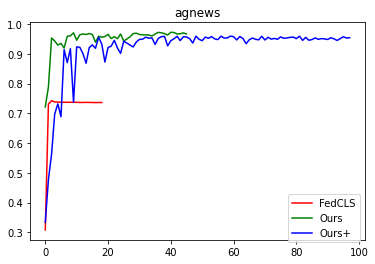

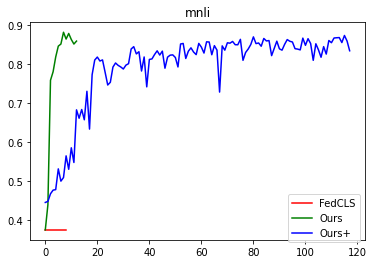

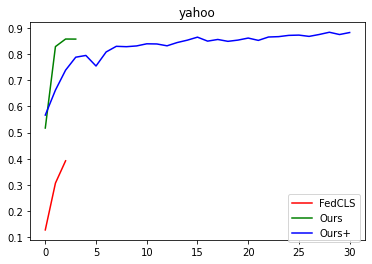

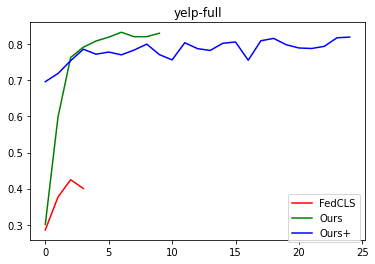

In [7]:
# round to accuracy
# i=0
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
round_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in filenames_list:
    filenames = filenames_list[dataset]
    fig = plt.figure()
    plt.title(dataset)
    for filename in filenames:
        log_path = os.path.join(root_path,dataset,filename)

        iter = 1000
        phrase = 'aggregated model performance is'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        for line in f:
            if phrase in line:
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') 

        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, round is {idx}")
        print(df)
        acc_list[dataset].append(this_max_acc)
        round_list[dataset].append(idx)
        
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(range(iter))
        print(np.array(y_mean)/full_set_acc[dataset])
        print(colors[filenames.index(filename)])

        plt.plot(range(iter),np.array(y_mean)/full_set_acc[dataset],label=labels[filenames.index(filename)],color=colors[filenames.index(filename)])
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.1),bbox_transform=fig.transFigure)
    fig.savefig(os.path.join(output_fig_path, f"{dataset}-roberta-large-round2accuracy.pdf"))
    # i = i+1

In [8]:
acc_list

{'agnews': [0.6905375382442928, 0.9046253236055543, 0.8925],
 'mnli': [0.3176573624595469, 0.7496049083063647, 0.74253693326541],
 'yahoo': [0.30584999999999996, 0.66865, 0.6888666666666666],
 'yelp-full': [0.29728, 0.58304, 0.57362]}

max accuracy is 0.6905375382442928, runtime is 50640.0
19 19
max accuracy is 0.9046253236055543, runtime is 2856640.0
46 46
max accuracy is 0.8925, runtime is 42174.5
98 98
max accuracy is 0.3176573624595469, runtime is 20240.0
9 9
max accuracy is 0.7496049083063647, runtime is 243400.0
13 13
max accuracy is 0.74253693326541, runtime is 52162.0
118 118
max accuracy is 0.30584999999999996, runtime is 36560.0
3 3
max accuracy is 0.66865, runtime is 183560.0
4 4
max accuracy is 0.6888666666666666, runtime is 17351.0
32 31
max accuracy is 0.29728, runtime is 36560.0
4 4
max accuracy is 0.58304, runtime is 282810.0
10 10
max accuracy is 0.57362, runtime is 32324.0
26 25


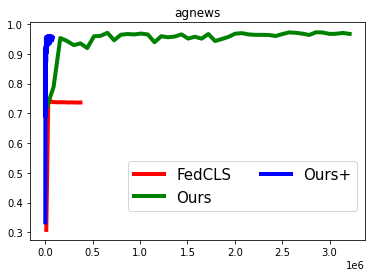

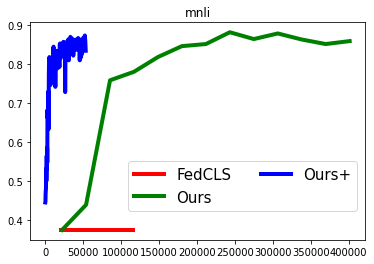

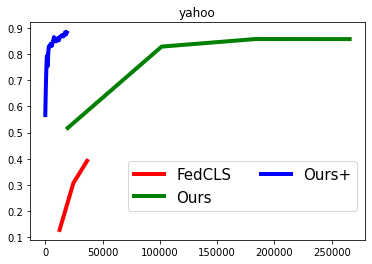

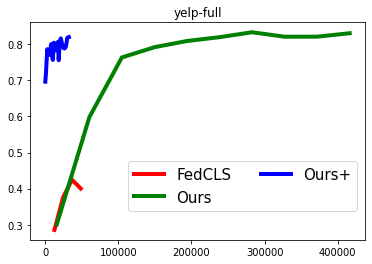

In [10]:
# time to accuracy  for roberta-large
t = 0   

acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
runtime_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}     
for dataset in filenames_list:
    filenames = filenames_list[dataset]
    fig = plt.figure()
    plt.title(dataset)
    for filename in filenames:
        log_path = os.path.join(root_path,dataset,filename)
   
        iter = 1000
        phrase = 'train data'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        runtime = []
        train_runtime = []
        infer_runtime = []
        time_stamp = 0
        train_time_stamp = 0
        infer_time_stamp = 0

        for line in f:
            if 'aggregated model performance is' in line: 
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc
        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")
        
        for line in f:
            if phrase in line:
                line_idx = f.index(line)
                
                train_info = f[line_idx]
                infer_info = f[line_idx + 1]
                
                # TX2: train, 1s/sample, infer, 0.5s/sample, no comm. because bit fit is parameter efficient.
                train_time = sum(list(map(int, re.findall(r'\d+', train_info.split("Gen")[1])))[1:]) * 1 
                infer_time = sum(list(map(int, re.findall(r'\d+', infer_info.split("Gen")[1])))[1:]) * 0.5
                comm_time = communication_latency_list["bitfit"] * 5
                time_stamp = time_stamp + train_time + infer_time + comm_time # elasped time of all clients / energy consumption
                train_time_stamp = train_time + train_time_stamp
                infer_time_stamp = infer_time + infer_time_stamp
                runtime.append(time_stamp)
                train_runtime.append(train_time_stamp)
                infer_runtime.append(infer_time_stamp)

        if len(runtime) == 0:
            fedpet_train_time = {
                # [datapoint*client_num*latency*heterogeneity*multiple]
                "agnews": np.array(([64] + [100] * (len(df.index)-1)))*5*1*2,
                "mnli": np.array(([1024] + [20*10] * (len(df.index)-1)))*5*1*2,
                "yahoo": np.array(([256] + [20*10] * (len(df.index)-1)))*5*1*2,
                "yelp-full": np.array(([256] + [20*10] * (len(df.index)-1)))*5*1*2,
            }
            fedpet_infer_time = {
                "agnews": np.array(([1200] + [1200*10]* (len(df.index)-1)))*5*0.5*2,
                "mnli": np.array(([392] + [392*10]* (len(df.index)-1)))*5*0.5*2,
                "yahoo": np.array(([1400] + [1400*10]* (len(df.index)-1)))*5*0.5*2,
                "yelp-full": np.array(([650] + [650*10]* (len(df.index)-1)))*5*0.5*2,
            }
            fedcls_train_time = {
                # [datapoint*multiple] *client_num*latency*heterogeneity
                "agnews": np.array(([64] + [100*10] * (len(df.index)-1)))*5*1*2,
                "mnli": np.array(([1024] + [20*10] * (len(df.index)-1)))*5*1*2,
                "yahoo": np.array(([256] + [20*10] * (len(df.index)-1)))*5*1*2,
                "yelp-full": np.array(([256] + [20*10] * (len(df.index)-1)))*5*1*2,
            }
            runtime = []
            tmp = 0
            if labels[filenames.index(filename)] == "Ours":
                for i in range(len(df.index)):
                    comm_time = communication_latency_list["full"] * 5
                    tmp = tmp + fedpet_train_time[dataset][i] + fedpet_infer_time[dataset][i] + comm_time
                    runtime.append(tmp)
            elif labels[filenames.index(filename)] == "FedCLS":
                for i in range(len(df.index)):
                    comm_time = communication_latency_list["full"] * 5
                    tmp = tmp + fedcls_train_time[dataset][i] + comm_time
                    runtime.append(tmp)



        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(f"max accuracy is {this_max_acc}, runtime is {runtime[idx]}")

        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])
            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(len(runtime),len(list(map(float, y_mean))))
        plt.plot(runtime[:len(y_mean)],np.array(y_mean)/full_set_acc[dataset],label=labels[filenames.index(filename)],color=colors[filenames.index(filename)],linewidth=4)
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.2),bbox_transform=fig.transFigure,ncol=2,fontsize=15)
    fig.savefig(os.path.join(output_fig_path, f"{dataset}-roberta-large-time2accuracy.pdf"))

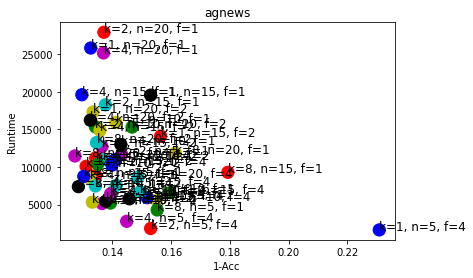

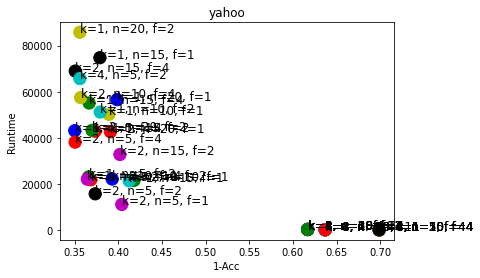

In [28]:
c=0
for dataset in datasets:
    fig = plt.figure()
    plt.title(f"{dataset}")
    plt.xlabel("1-Acc")
    plt.ylabel("Runtime")
    plt.scatter(1- np.array(acc_list[dataset]), np.array(runtime_list[dataset]),s=150,color=colors[:len(acc_list[dataset])])
    for idx in range(len(acc_list[dataset])):
        plt.text(1-acc_list[dataset][idx], runtime_list[dataset][idx], labels[idx], fontsize=12)
    plt.savefig(os.path.join(output_fig_path, f"c{c}.pdf"))
    c=c+1